# Problem Statement

#### This project aims to understand how the students performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course 

# Data Collection

### Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
### The data contains 8 columns and 1000 rows

# Import Data and Required Packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

# Dataset information

### gender: sex of students -> (Male/Female)
### race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
### parental level of education : parents final education -> (bechelor's degree, some college degree, master's degree, associate's degree, high school)
### lunch : having lunch before test (standard or free/reduced)
### test preparation course : complete or not complete before test
### math score
### reading score
### writing score

## We perform Data Checks in the order:
### Check Missing values
### Check data type
### Check the number of unique values of each column
### Check statistics of data set
### Check various categories present in the different categorical column 

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

### From above description of numerical data, all means cann be seen very close to each other - between 66 and 68.05
### All standard deviations are also close - between 14.6 and 15.19
### While there is a minimum score 0 for math, for writing , the minimum is much higher = 10 and for reading, its even higher = 17

# Exploring Data

In [16]:
print("Categories in 'gender' variable:    ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of eduation' variable:    ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of eduation' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for "Total Score" and "Average"

In [18]:
# We do feature engineering to create new columns

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [20]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Numer of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Numer of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


## Insights

### From above values we conclude that students have performed the worst in Maths
### Best performance is in reading section

# Exploring Data (Visualisation)

## Visualise average score distribution to make some conclusion

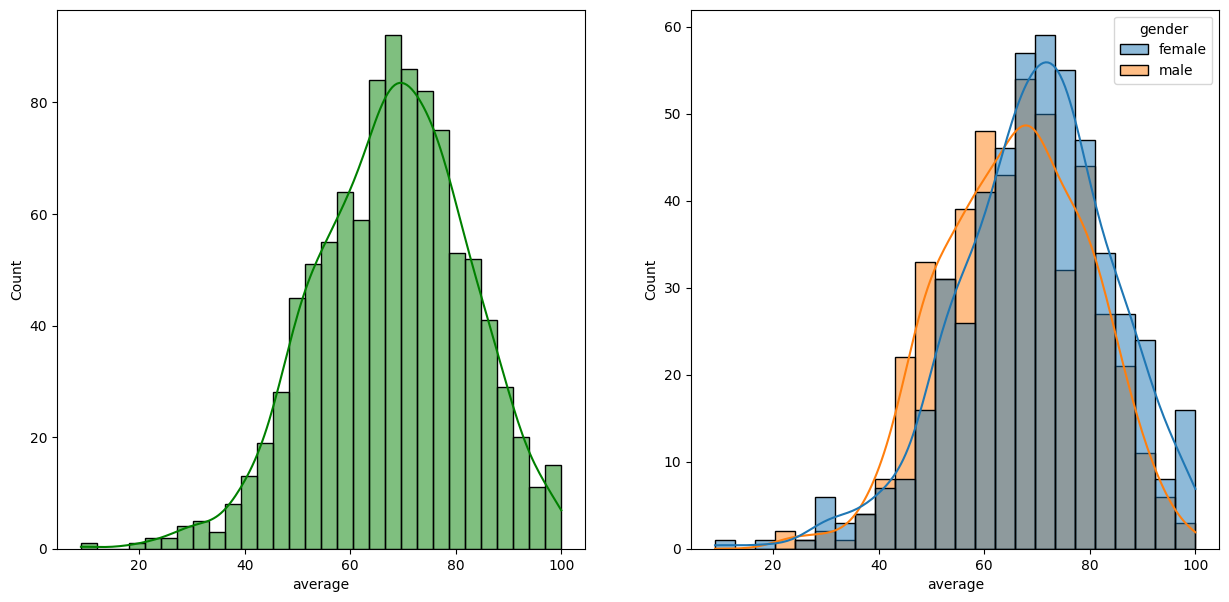

In [21]:
# Gender wise comparison

fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

## INSIGHTS

### Female tend to perform better than male students

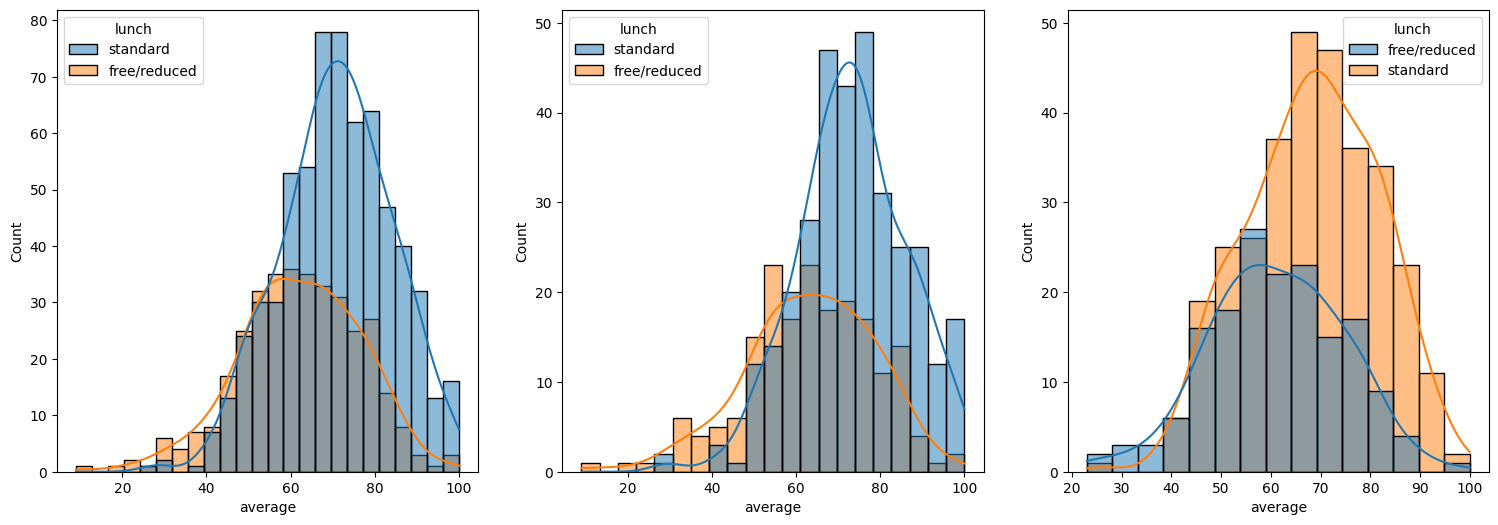

In [22]:
# Effect of lunch on genderwise performance

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

## INSIGHTS

### Standard lunch helps perform better in exams
### Standard lunch helps perform better irrespective of gender

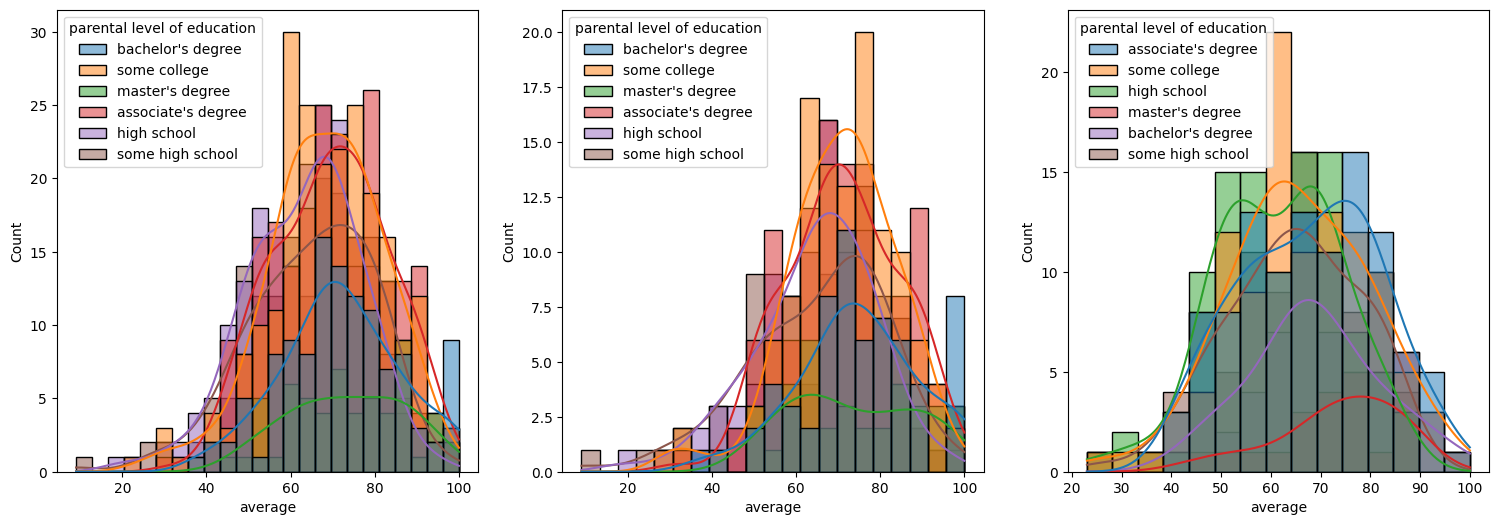

In [23]:
# Gender wise performance with respect to the parental's level of education

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

## INSIGHTS

### Parent's education don't tend to affect much. However, there is a noticeable difference between genders
### 2nd plot shows that if parent's  education level is of master's or associate level, their male child tends to perform better
### 3rd plot shows that there is no effect of parent's education level on the performance of their female child 

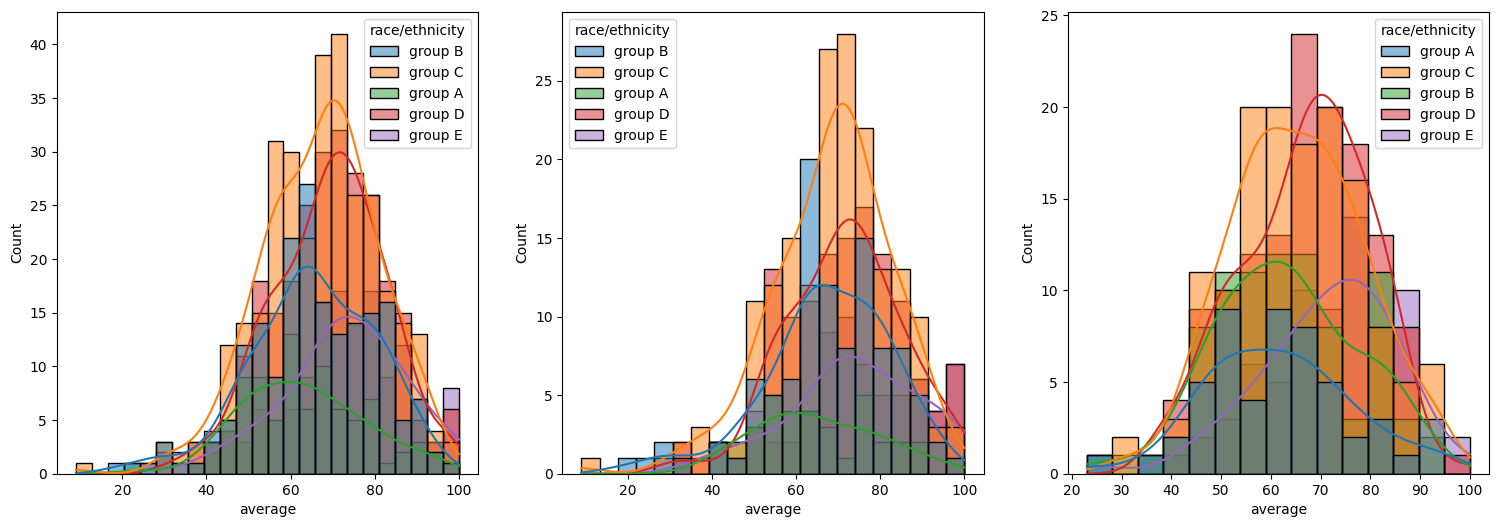

In [24]:
# Gender wise performance with respect to the race/ethnicity

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

## INSIGHTS

### Students of group A and group B tend to perform poorly as compared to group C, group D, and group E students who perform consistently well 
### Students of group A and group B tend to perform poorly irrespective of gender. 
### There is more variation in group performance with respect to male students (3rd plot)

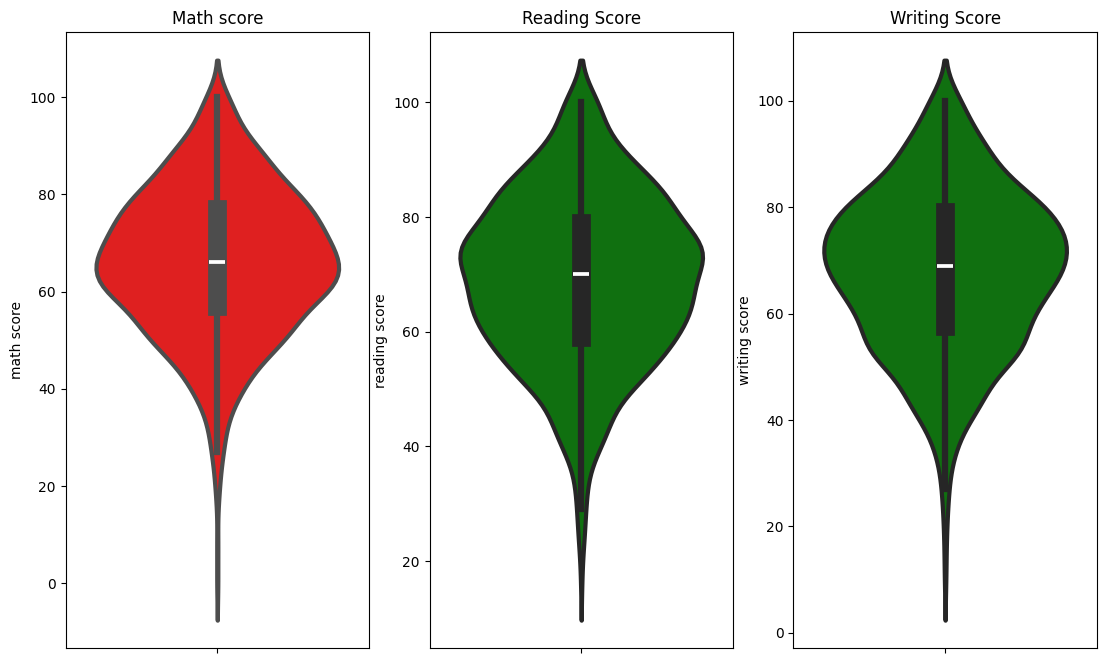

In [25]:
# Variation in maximum score of all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math score')
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(data=df,y='reading score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(data=df,y='writing score',color='green',linewidth=3)
plt.show()

## INSIGHTS

### The distribution of math score is sharp and narrow indicating that most of the students score lie in the range of 60-80
### The distibution of reading and writing score is broad indicating that most of the students score lie in the range of 50-90

## Multivariate analysis using pieplot

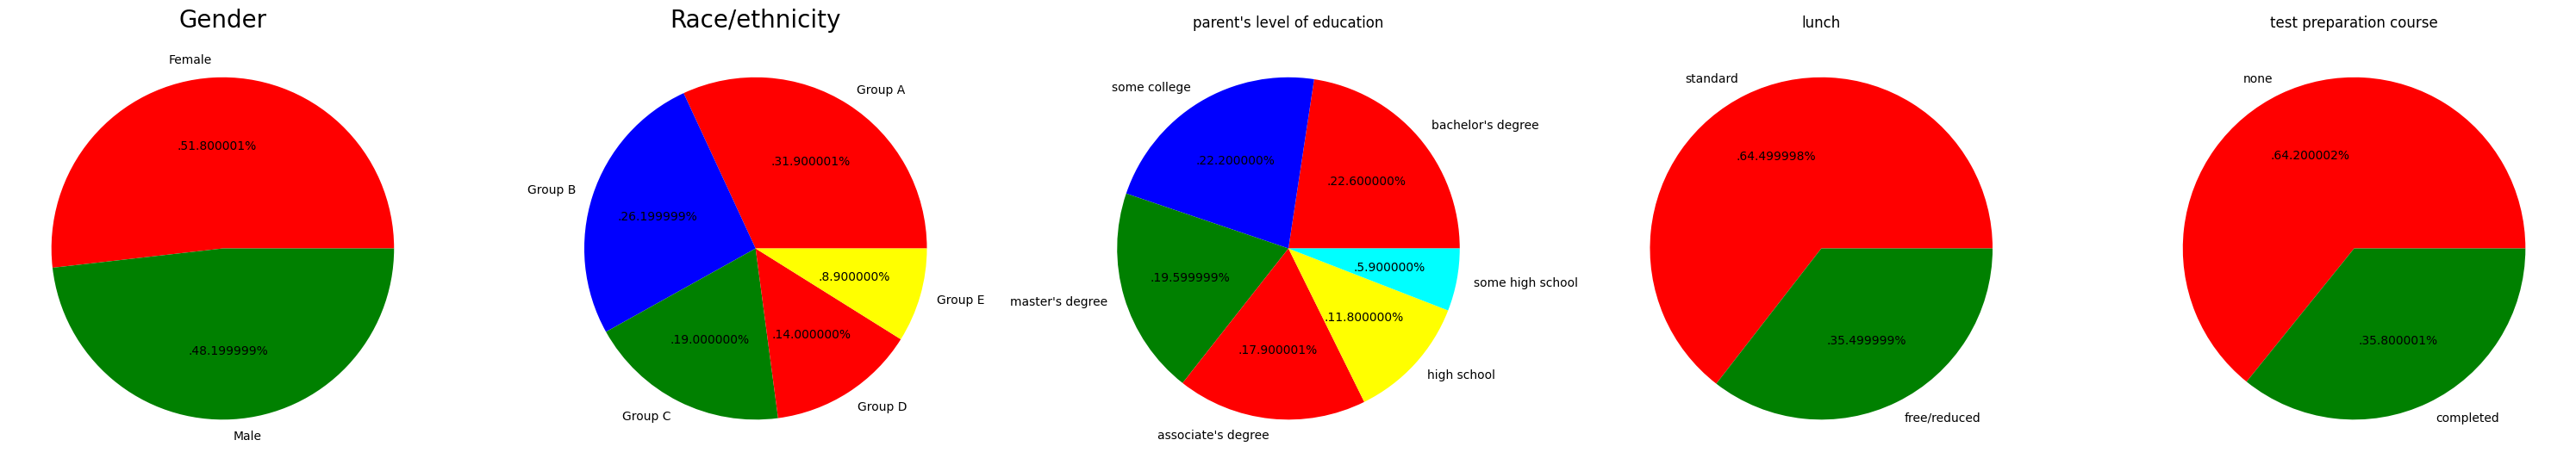

In [32]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red','blue','green','red','yellow']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'
color = ['red','blue','green','red','yellow','cyan']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("parent's level of education")
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('lunch')
plt.axis('off')

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
labels = 'none', 'completed'
colors = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('test preparation course')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## INSIGHTS

### The proportion of male and female students is almost same
### Group C has the most students
### Number of students having standard lunch is greater
### Most of the students haven't done the test preparation course
### Parent's education level is unfiromly distributed except for the high school

## Feature Wise Visualisation

## Gender Column

### -> Distribution of gender
### -> Does gender have any impact on student's performance

## UNIVARIATE ANALYSIS (for distribution of gender)

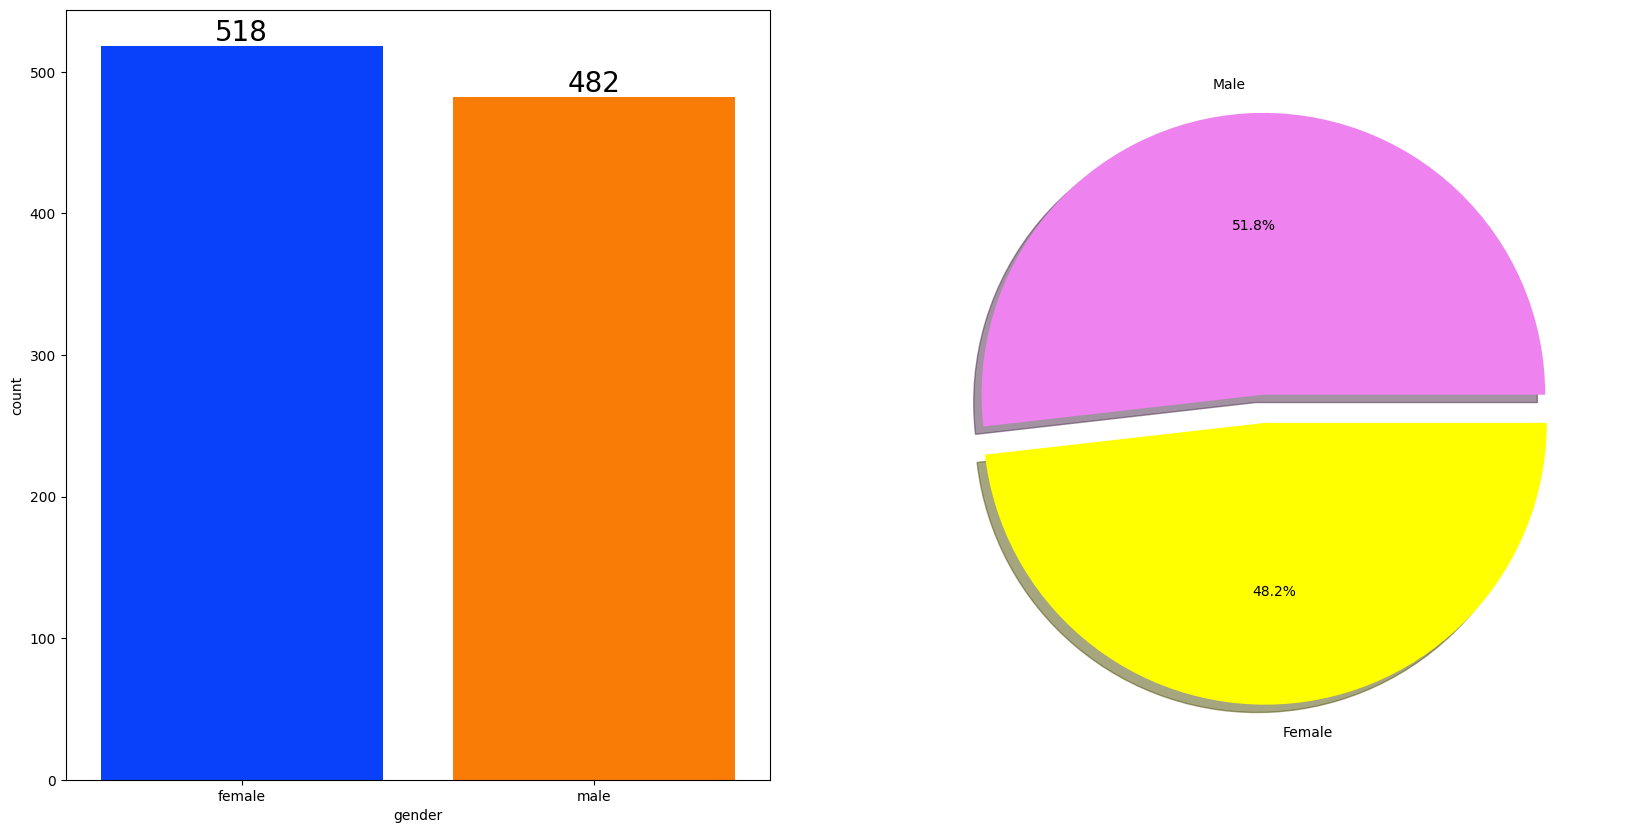

In [34]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['violet','yellow'])
plt.show()

## INSIGHTS

### We have a balanced gender data

## BIVARIATE ANALYSIS (Does gender have any impact on student's performance)

In [40]:
# We can perform groupby operation on only the numeric columns 
numeric_columns = df.select_dtypes(include=['int','float']).columns
gender_group = df.groupby('gender')[numeric_columns].mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


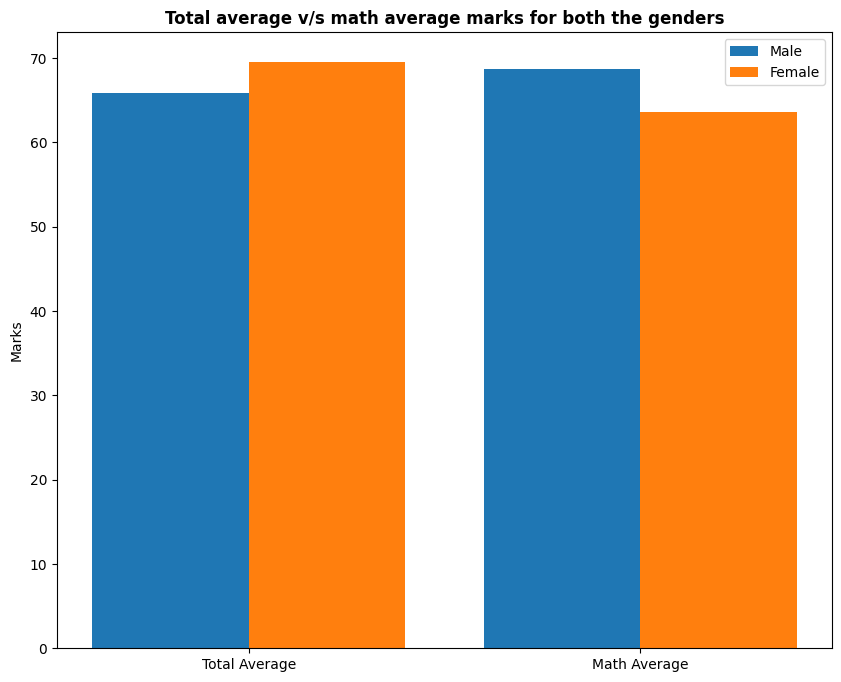

In [43]:
plt.figure(figsize=(10,8))

x = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2,male_scores,0.4,label='Male')
plt.bar(x_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total average v/s math average marks for both the genders', fontweight='bold')
plt.legend()
plt.show()

## INSIGHTS

### Females perform overall better than men
### Males perform better at maths than females 

## RACE/ETHNICITY COLUMN

### How is group wise distribution
### Does race ethnicity have an impact on student's performance 

## UNIVARIATE ANALYSIS (Group wise distribution)

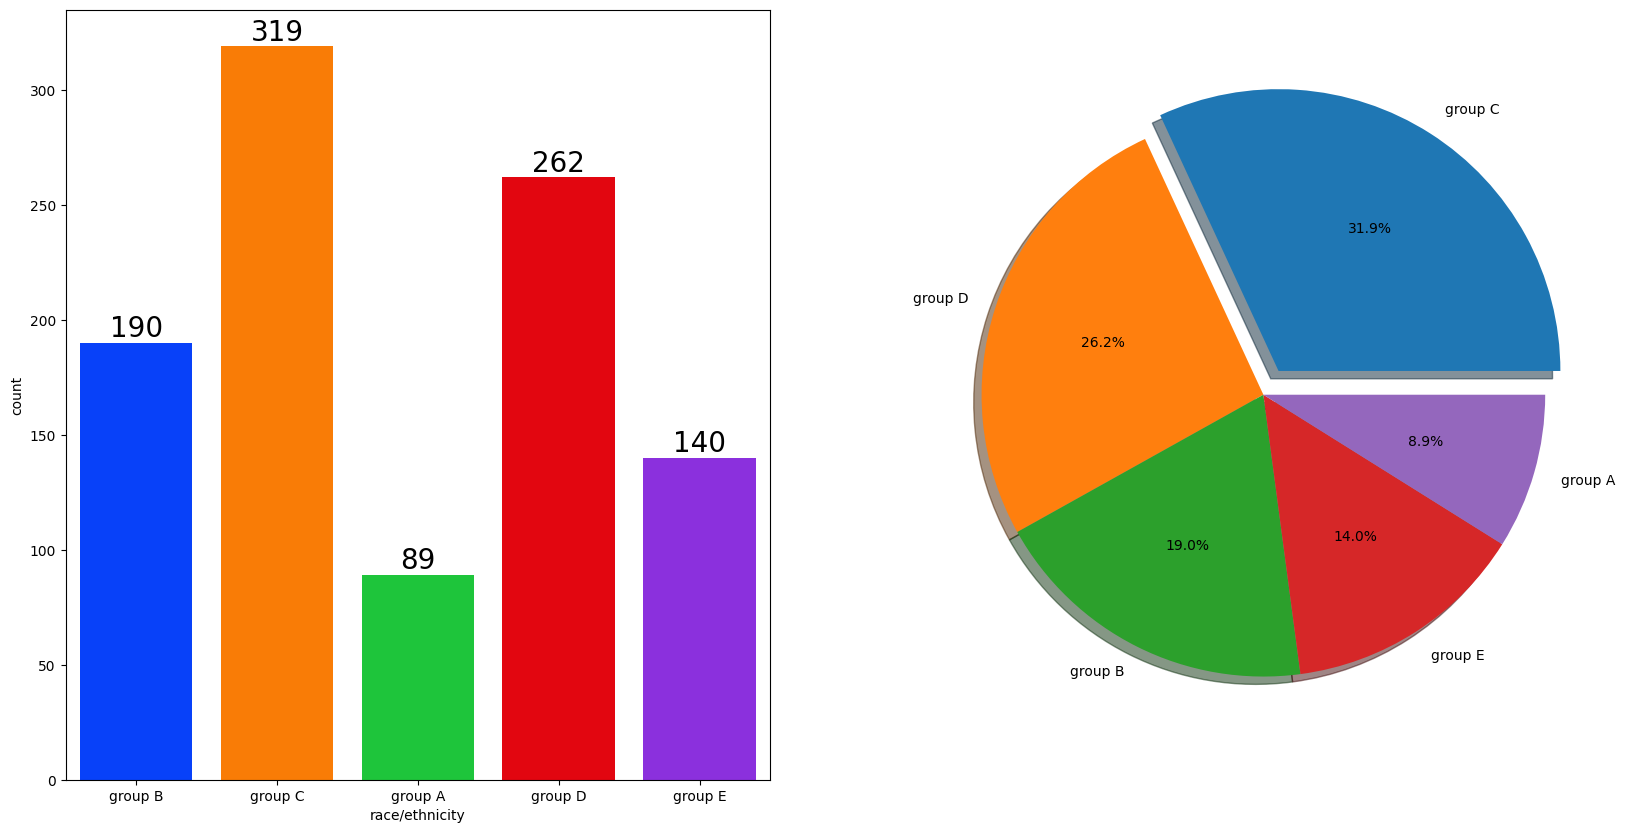

In [45]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

## INSIGHTS

### Most of the students belong to group-C/group-D
### Lowest number of students belong to groupA

## BIVARIATE ANALYSIS (Does Race/Ethnicity have any impact on student's performance)

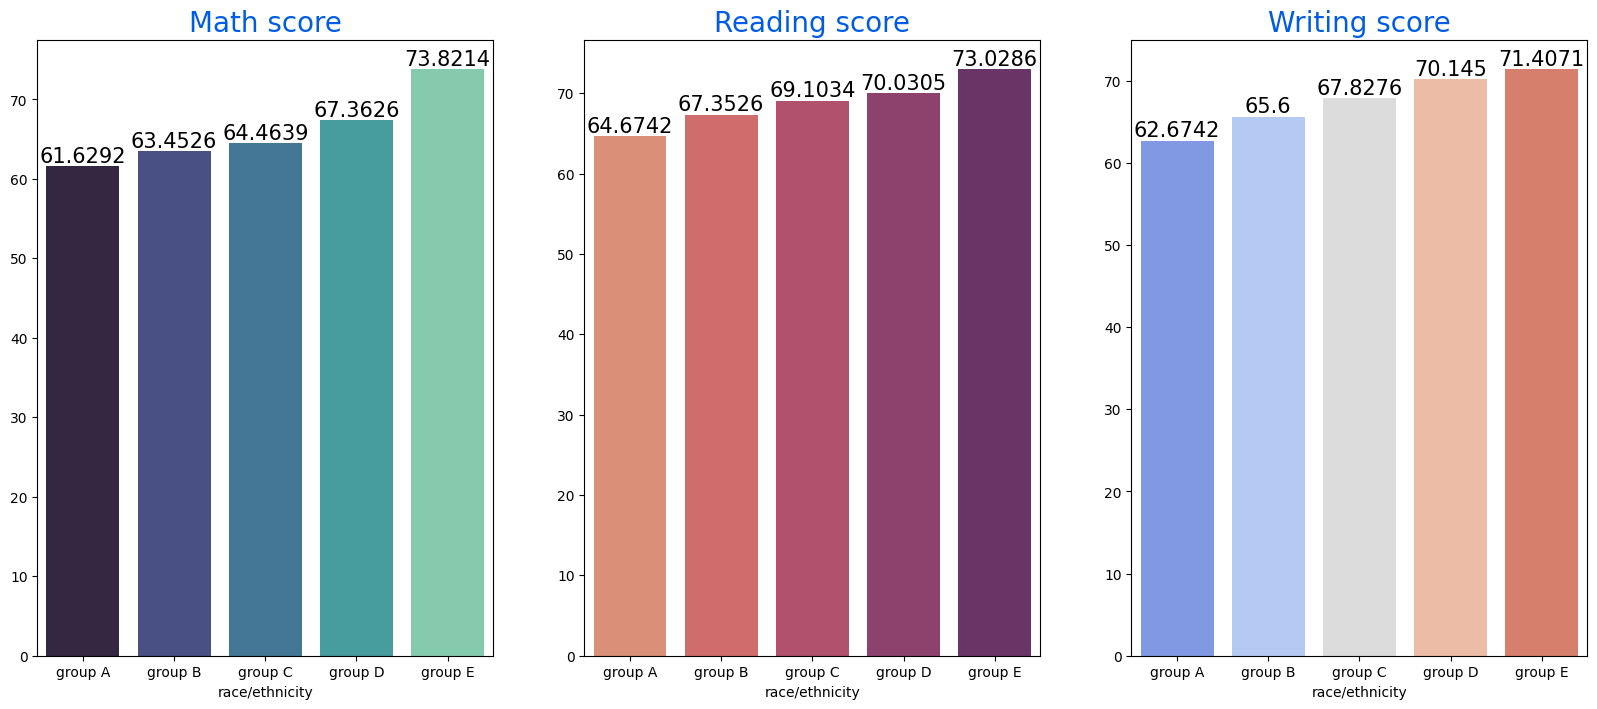

In [47]:
Group_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## INSIGHTS

### Group E students performs the best in all 3 subjects
### Group A students performs the worst in all 3 subjects
### We conclude that socioeconomic status affects performance

## PARENTAL LEVEL OF EDUCATION COLUMN

### What is educational background of student's parent
### Does parental education have any impact in performance

## UNIVARIATE ANALYSIS (Educational background of parents)

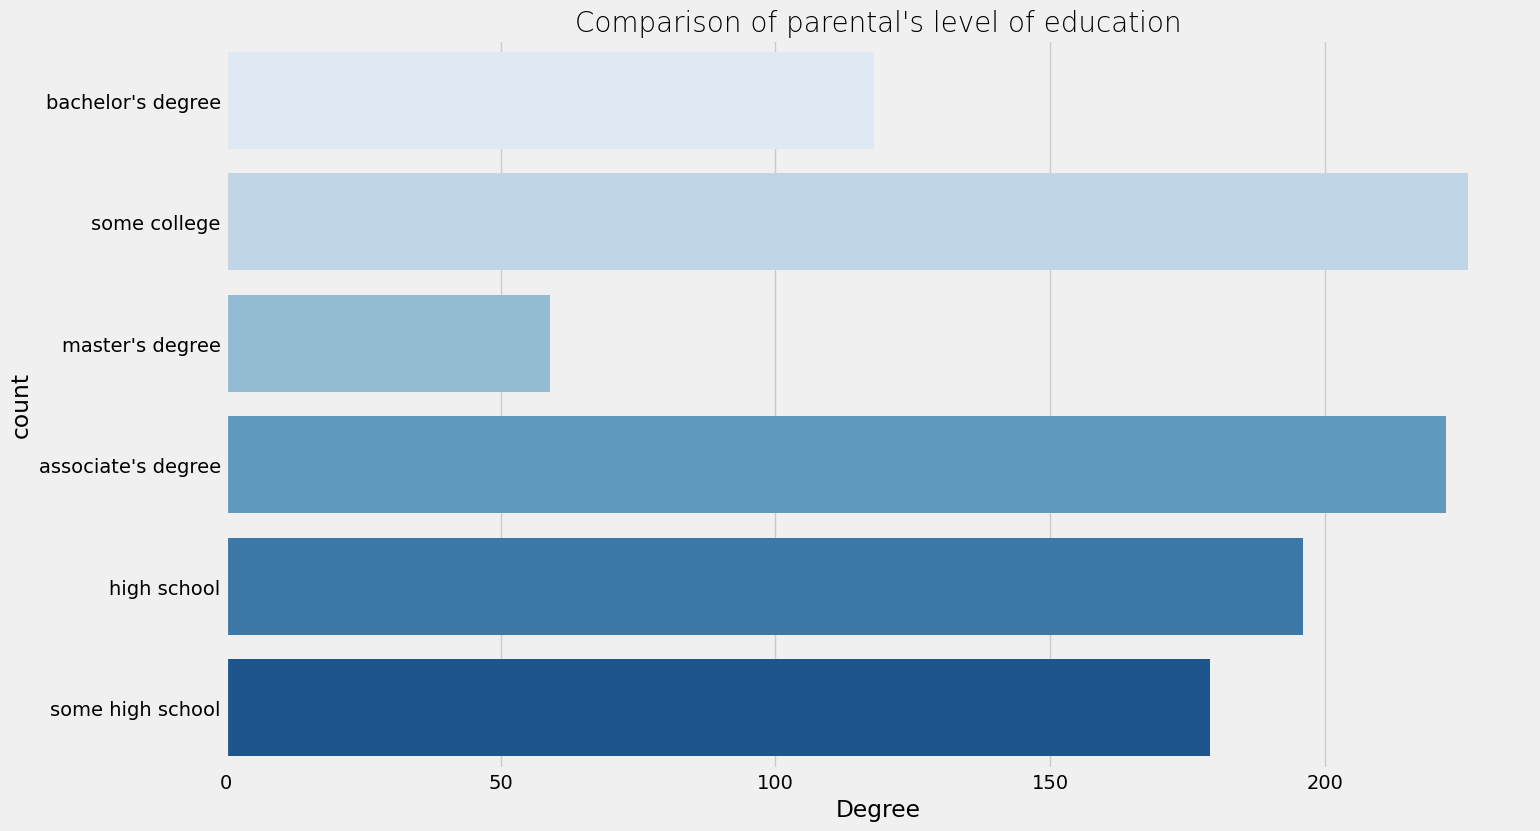

In [48]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title("Comparison of parental's level of education", fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## INSIGHTS

### Most of the student's parents have attended some college

## BIVARIATE ANALYSIS (Does parental's level of education affect student's performance)

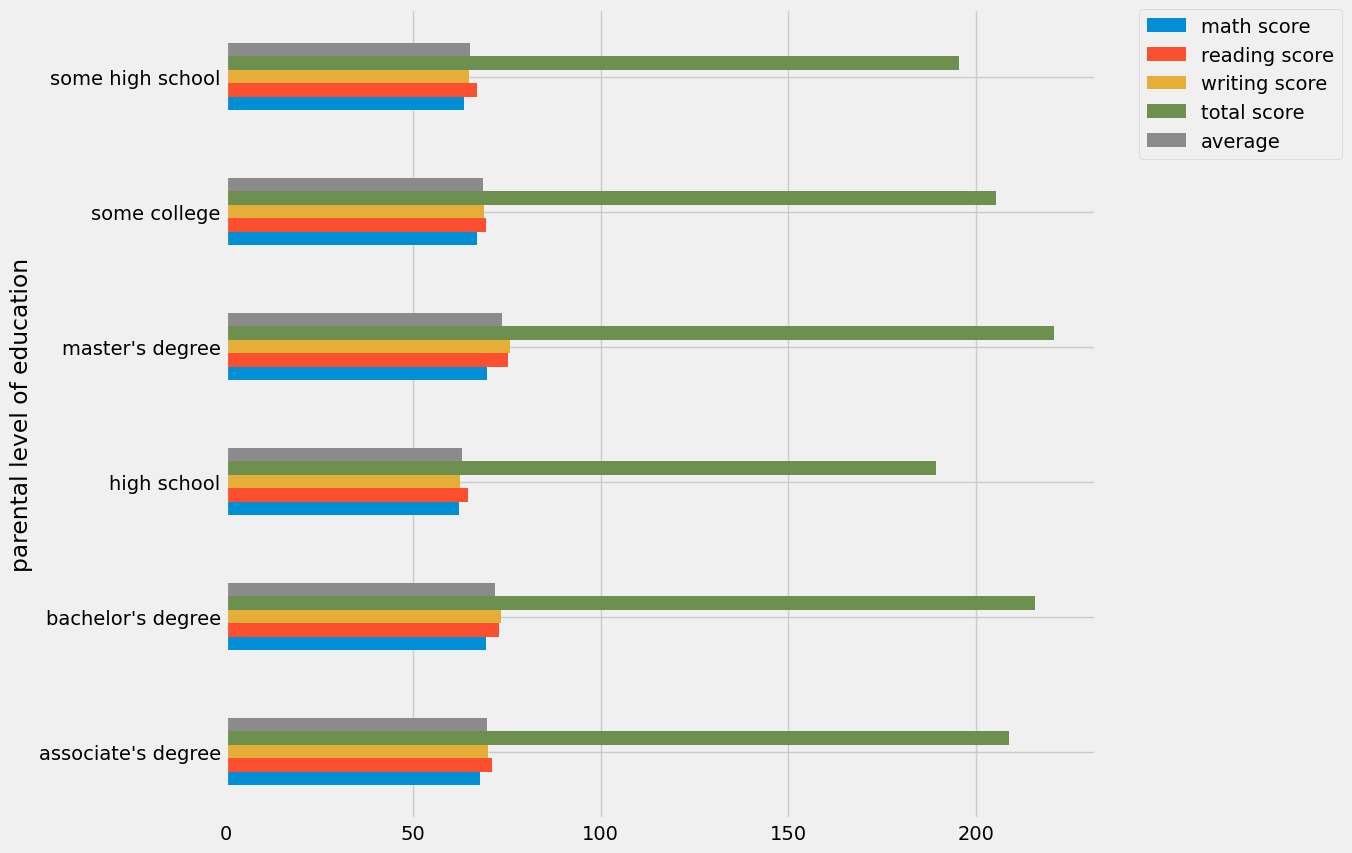

In [50]:
numeric_columns = df.select_dtypes(include=['int','float']).columns
df.groupby('parental level of education')[numeric_columns].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

## INSIGHTS

### Student's whose parent's have Bachelor's and Master's degree tend to perform better than other groups

## LUNCH COLUMN

### Which type of lunch is most common among students
### What is the effect of lunch type on student's performance 

## UNIVARIATE ANALYSIS (Most common lunch)

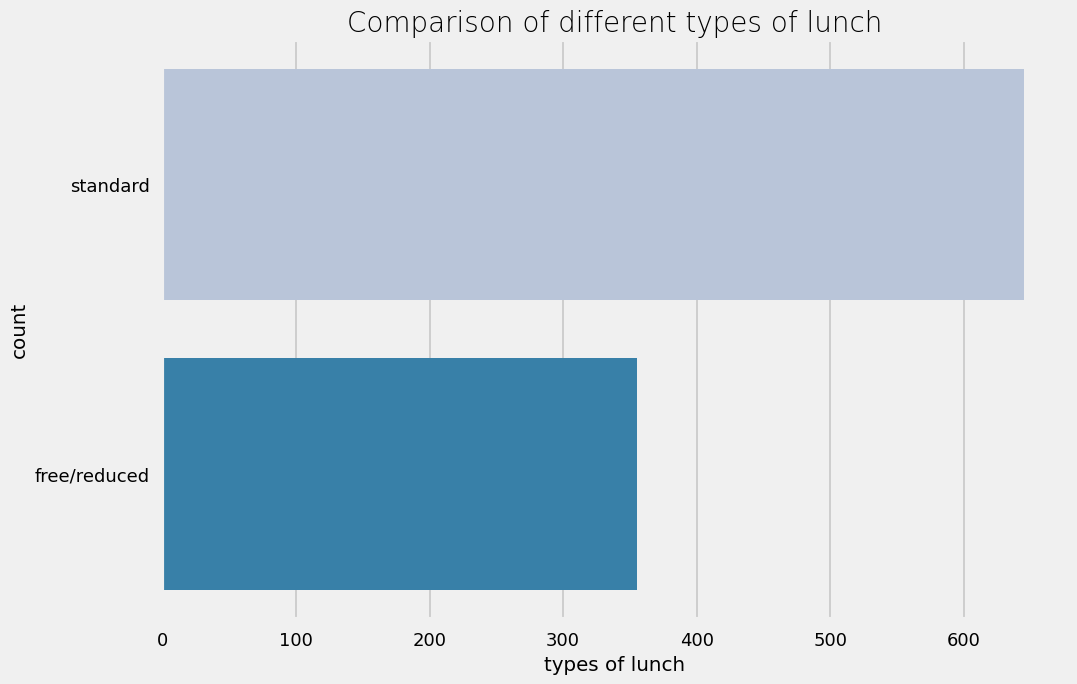

In [51]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## INSIGHTS

### Most of the students are served lunch

## BIVARIATE ANALYSIS (Does lunch type have any impact on student's performance)

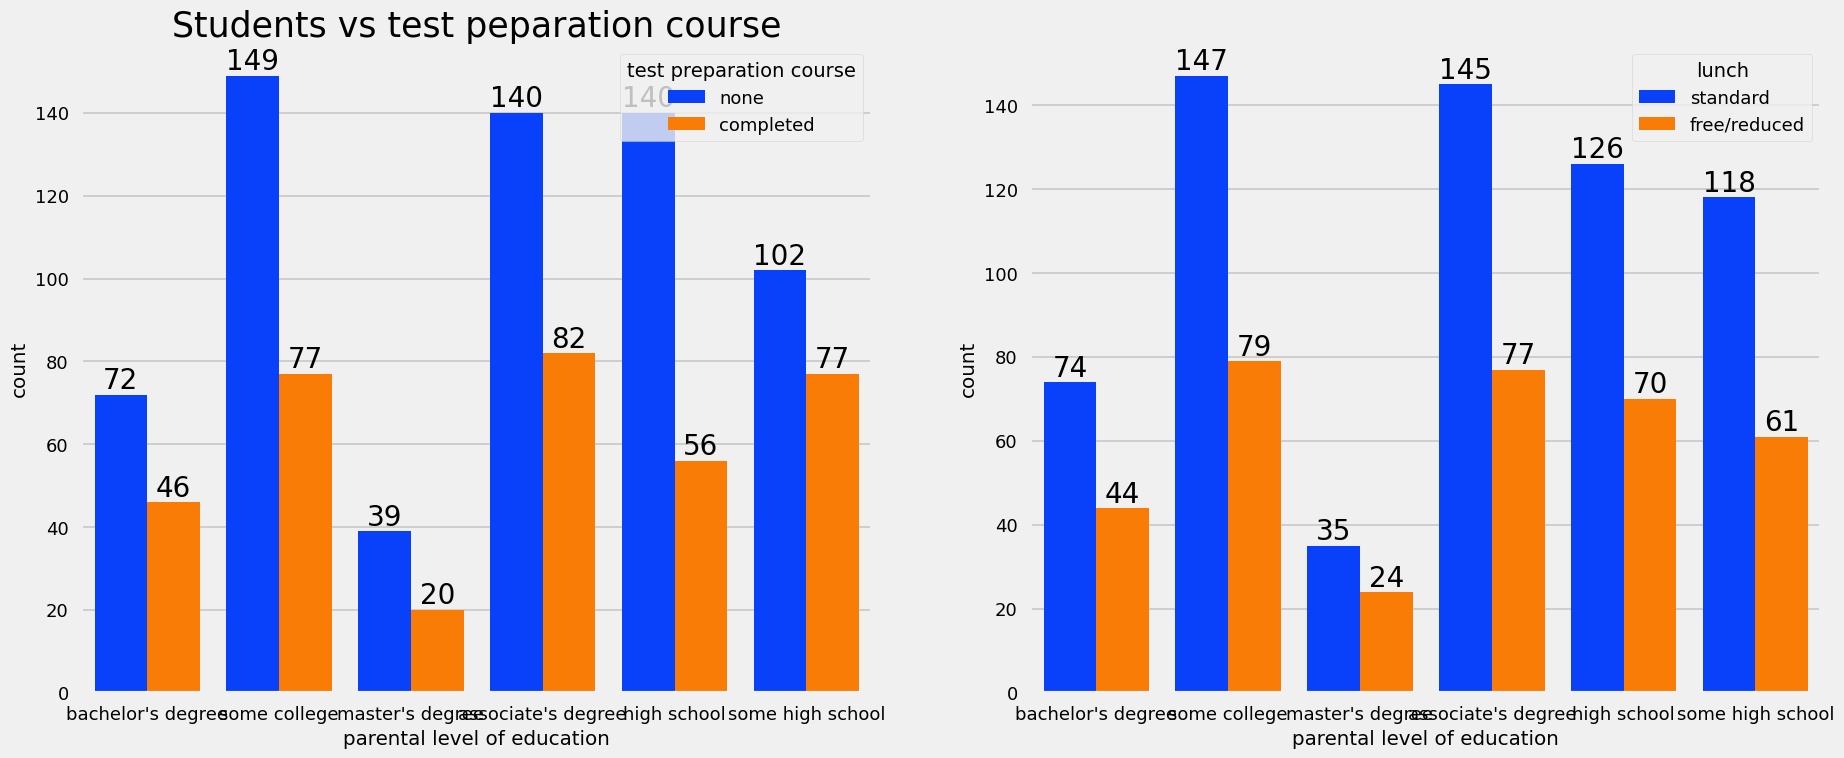

In [55]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test peparation course', color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

## INSIGHTS

### Students who haven't done test preparation varies uniformly with their parent's level of education. However, there is a slight discrepancy that can be noticed.
### The proportion of students getting served standard lunch varies uniformly with the parent's level of education

## TEST PREPARATION COLUMN

### What is the distribution of test takers
### Does test preparation course have any impact on student's performance

## UNIVARAITE ANALYSIS (distribution of test takers)

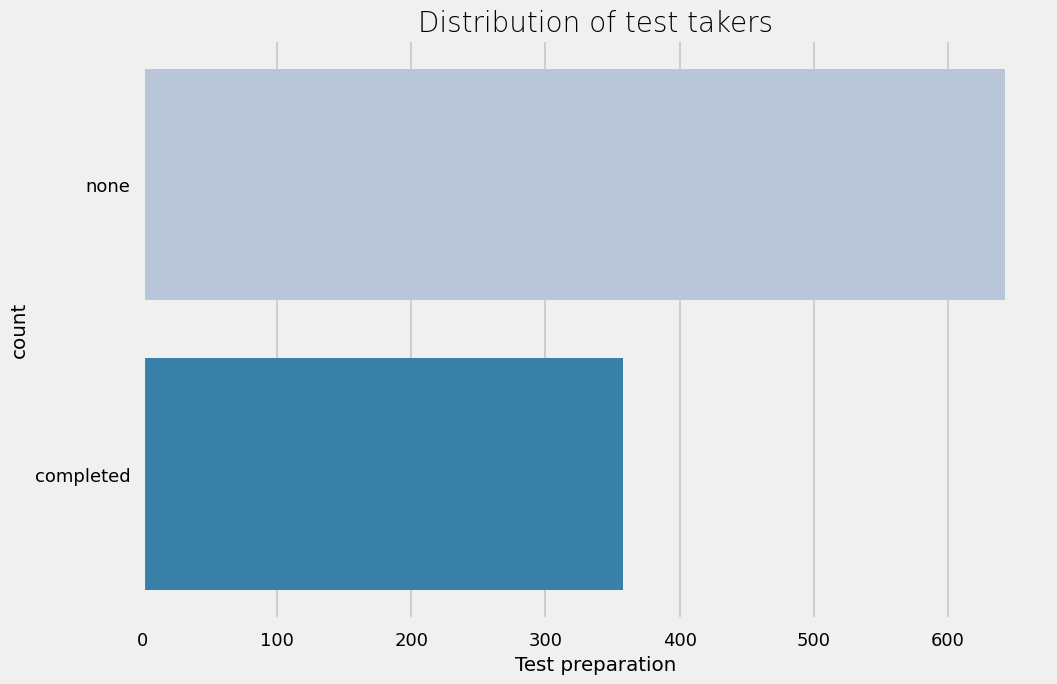

In [56]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['test preparation course'],palette='PuBu')
plt.title('Distribution of test takers',fontweight=30,fontsize=20)
plt.xlabel('Test preparation')
plt.ylabel('count')
plt.show()

## INSIGHTS

### Most of the students haven't taken a test preapartion course

## BIVARIATE ANALYSIS (Does test preparation have an impact on performance)

<Axes: xlabel='lunch', ylabel='writing score'>

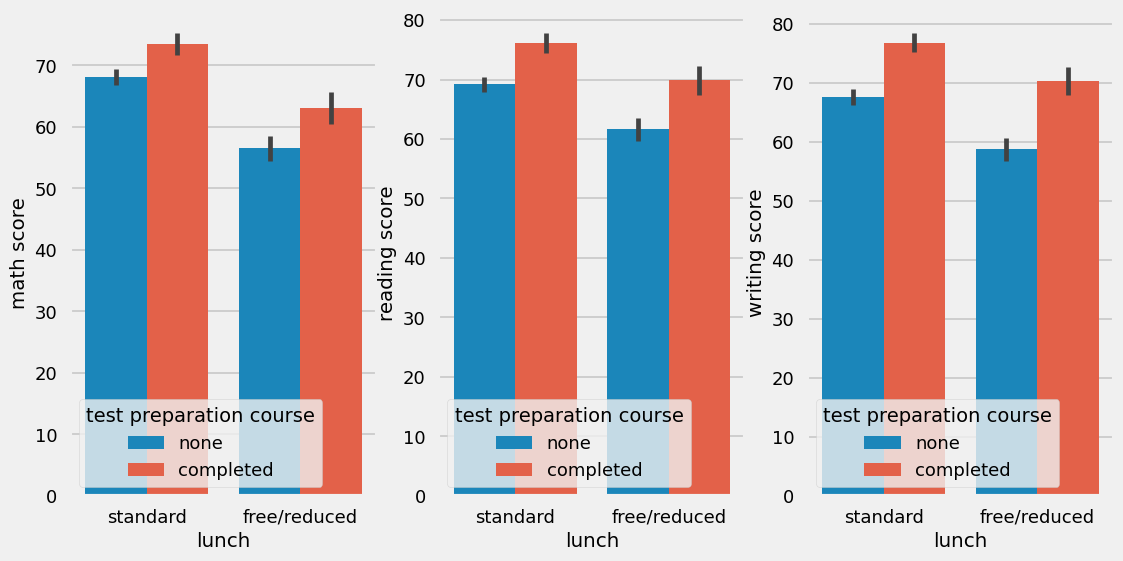

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(x=df['lunch'],y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot(x=df['lunch'],y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot(x=df['lunch'],y=df['writing score'], hue=df['test preparation course'])

## INSIGHTS

### Students who have taken test preparation course perform better 
### Students perform better with test preparation course irrespective of the type of lunch they are served 

# CHECKING OUTLIERS

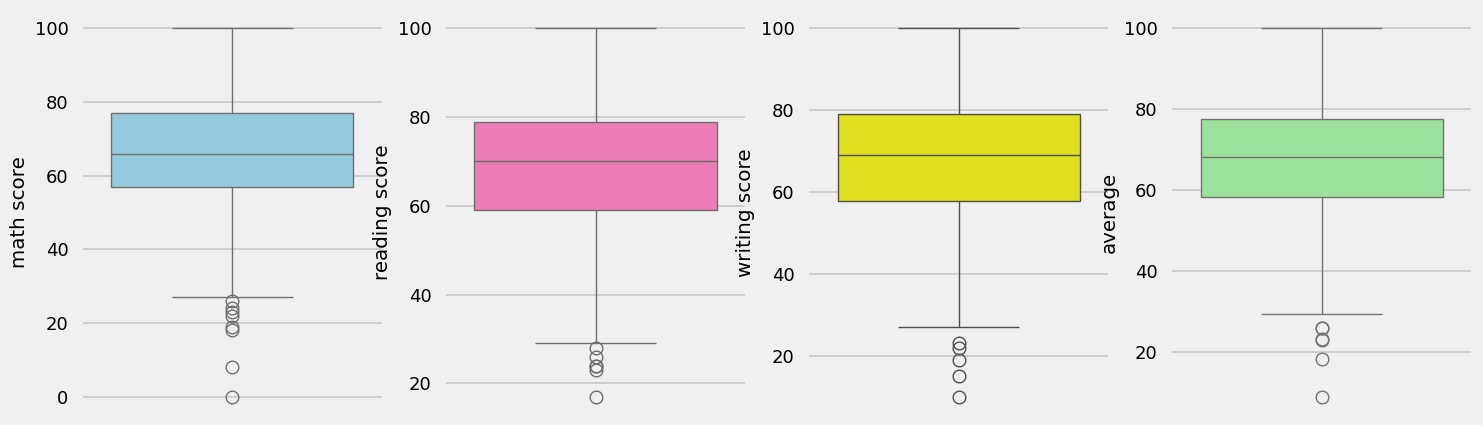

In [59]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## INSIGHTS

### Most of the student score between an interval of 60-80 for all the 3 subjects
### But there are students who have scored less than 20. We can't consider them outliers as their number is significant.

## MULTIVARAITE ANALYSIS USING PAIRPLOT

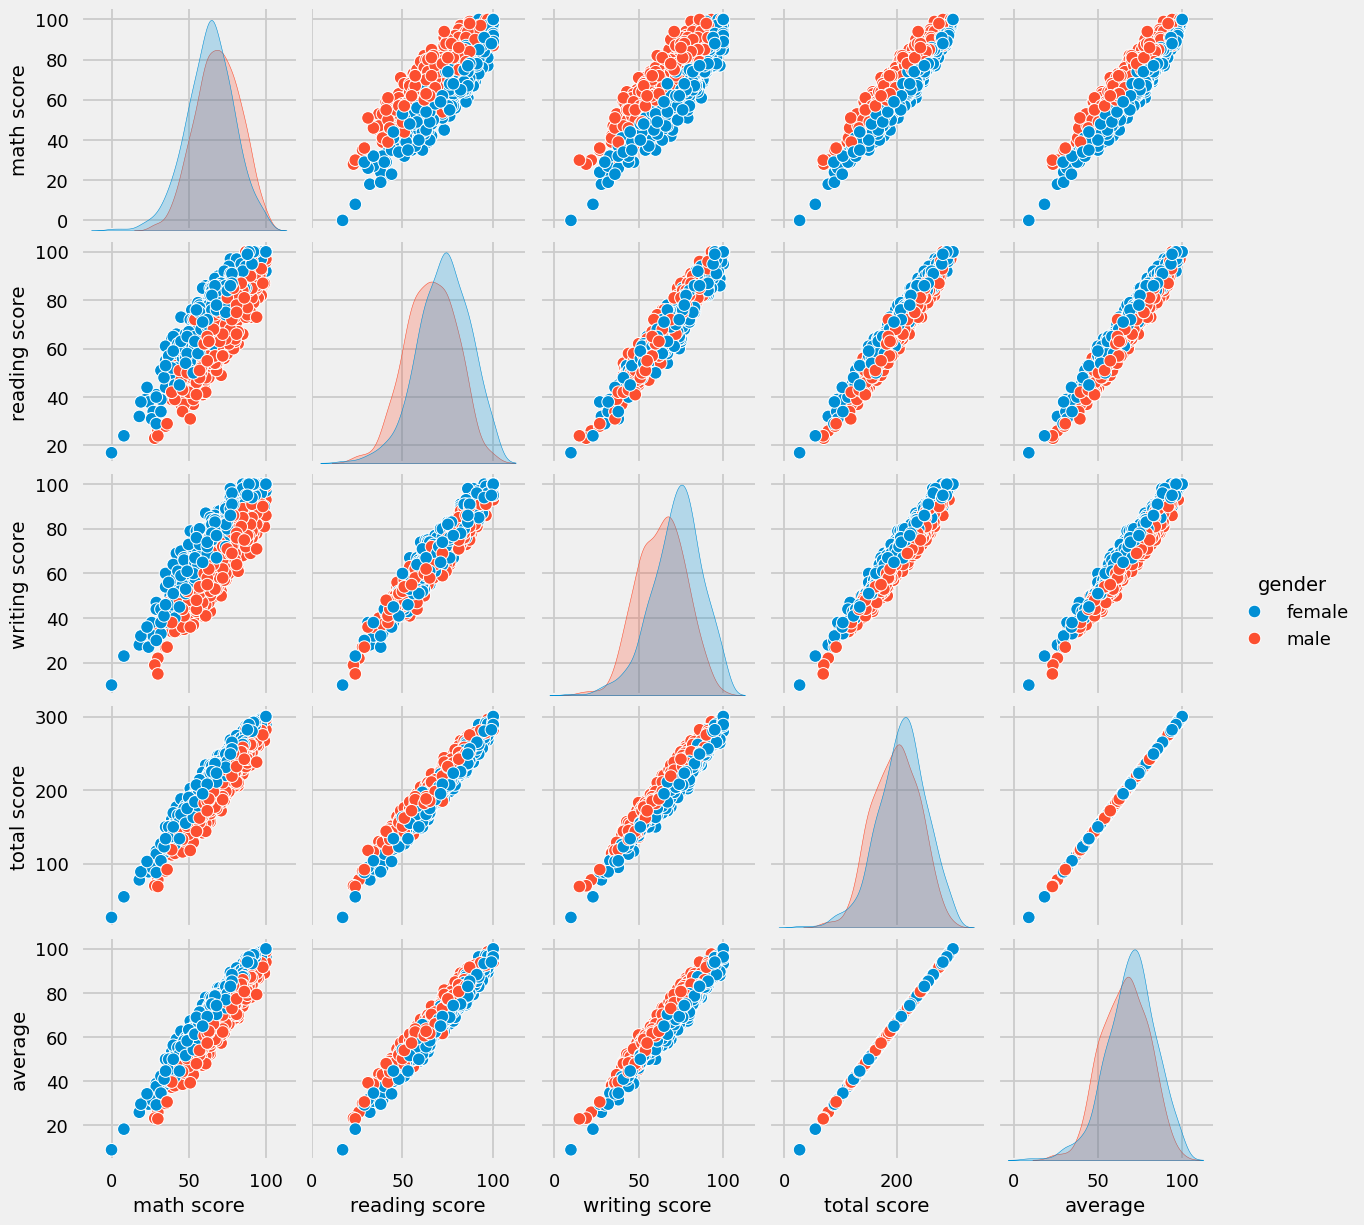

In [60]:
sns.pairplot(df,hue='gender')
plt.show()

## INSIGHTS

### We can clearly see that all the features vary linearly with respect to each other

## CONCLUSIONS

### Student's performance is related to lunch, race, parental level of education
### Females score more than males and are consistent top scorers
### Student's performance isn't much dependent on the test preparation course
### But, finishing test preparation course is beneficial